In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading in raw data csv's from scraper

In [19]:
coaches_season = pd.read_csv('coaches_season.csv', encoding="utf-8-sig")
RS_exp_stand_Team = pd.read_csv('RS_exp_stand_Team.csv', encoding="utf-8-sig")
PSO_Team = pd.read_csv('PSO_Team.csv', encoding="utf-8-sig")

all_award_coach_voting = pd.read_csv('all_award_coach_voting.csv', encoding="utf-8-sig")
all_award_voting = pd.read_csv('all_award_voting.csv', encoding="utf-8-sig")

PO_Totals_Player = pd.read_csv('PO_Totals_Player.csv', encoding="utf-8-sig")
PO_Advanced_Player = pd.read_csv('PO_Advanced_Player.csv', encoding="utf-8-sig")
PO_Per_Game_Player = pd.read_csv('PO_Per_Game_Player.csv', encoding="utf-8-sig")

PO_Advanced_Team = pd.read_csv('PO_Advanced_Team.csv', encoding="utf-8-sig")

RS_Advanced_Team = pd.read_csv('RS_Advanced_Team.csv', encoding="utf-8-sig")
RS_Opp_Per_Game_Team = pd.read_csv('RS_Opp_Per_Game_Team.csv', encoding="utf-8-sig")
RS_Per_Game_Team = pd.read_csv('RS_Per_Game_Team.csv', encoding="utf-8-sig")

RS_Totals_Player = pd.read_csv('RS_Totals_Player.csv', encoding="utf-8-sig")
RS_Advanced_Player = pd.read_csv('RS_Advanced_Player.csv', encoding="utf-8-sig")
RS_Per_Game_Player = pd.read_csv('RS_Per_Game_Player.csv', encoding="utf-8-sig")

PO_Schedule_Team = pd.read_csv("PO_Schedule_Team.csv", encoding="utf-8-sig")
RS_Schedule_Team = pd.read_csv("RS_Schedule_Team.csv", encoding="utf-8-sig")

custom_team_season_index = pd.read_csv("custom_team_season_index.csv", encoding="utf-8-sig")
custom_team_franchise_index = pd.read_csv("custom_team_franchise_index.csv", encoding="utf-8-sig")

PO_Schedule_Team['Season'] = PO_Schedule_Team['Season'].round().astype(int)
RS_Schedule_Team['Season'] = RS_Schedule_Team['Season'].round().astype(int)

### Player Database | File that Stores all Necessary Player Data

In [20]:
#rename columns in RS_Totals_Player with 'rs_totals_' prefix-ja
columns_to_rename_totals = [
    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]
RS_Totals_Player.rename(columns={col: f'rs_totals_{col}' for col in columns_to_rename_totals}, inplace=True)

#rename columns in RS_Advanced_Player with 'rs_advance_' prefix-ja
columns_to_rename_advanced = [
    'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'
]
RS_Advanced_Player.rename(columns={col: f'rs_advance_{col}' for col in columns_to_rename_advanced}, inplace=True)

#rename columns in RS_Per_Game_Player with 'rs_per_game_' prefix-ja
columns_to_rename_per_game = [
    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]
RS_Per_Game_Player.rename(columns={col: f'rs_per_game_{col}' for col in columns_to_rename_per_game}, inplace=True)

#merge RS_Totals_Player into RS_Advanced_Player-ja
columns_to_merge_totals = [
    'rs_totals_GS', 'rs_totals_MP', 'rs_totals_FG', 'rs_totals_FGA', 'rs_totals_FG%', 'rs_totals_3P', 'rs_totals_3PA', 'rs_totals_3P%', 'rs_totals_2P', 'rs_totals_2PA', 'rs_totals_2P%', 'rs_totals_eFG%', 'rs_totals_FT', 'rs_totals_FTA', 'rs_totals_FT%', 'rs_totals_ORB', 'rs_totals_DRB', 'rs_totals_TRB', 'rs_totals_AST', 'rs_totals_STL', 'rs_totals_BLK', 'rs_totals_TOV', 'rs_totals_PF', 'rs_totals_PTS'
]
RS_Advanced_Player = RS_Advanced_Player.merge(
    RS_Totals_Player[['season', 'Player'] + columns_to_merge_totals], 
    on=['season', 'Player'], 
    how='left'
)

#remove duplicates based on 'season' and 'Player'-ja
RS_Advanced_Player = RS_Advanced_Player.drop_duplicates(subset=['season', 'Player'])

#merge RS_Per_Game_Player into RS_Advanced_Player-ja
columns_to_merge_per_game = [
    'rs_per_game_MP', 'rs_per_game_FG', 'rs_per_game_FGA', 'rs_per_game_FG%', 'rs_per_game_3P', 'rs_per_game_3PA', 'rs_per_game_3P%', 'rs_per_game_2P', 'rs_per_game_2PA', 'rs_per_game_2P%', 'rs_per_game_eFG%', 'rs_per_game_FT', 'rs_per_game_FTA', 'rs_per_game_FT%', 'rs_per_game_ORB', 'rs_per_game_DRB', 'rs_per_game_TRB', 'rs_per_game_AST', 'rs_per_game_STL', 'rs_per_game_BLK', 'rs_per_game_TOV', 'rs_per_game_PF', 'rs_per_game_PTS'
]
RS_Advanced_Player = RS_Advanced_Player.merge(
    RS_Per_Game_Player[['season', 'Player'] + columns_to_merge_per_game], 
    on=['season', 'Player'], 
    how='left'
)

#remove duplicates based on 'season' and 'Player'-ja
RS_Advanced_Player = RS_Advanced_Player.drop_duplicates(subset=['season', 'Player'])

#=================================================================================================================================

#assuming PO_Totals_Player, PO_Advanced_Player, PO_Per_Game_Player, and RS_Advanced_Player DataFrames are already loaded-ja

#rename columns in PO_Totals_Player with 'po_totals_' prefix-ja
columns_to_rename_totals = [
    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]
PO_Totals_Player.rename(columns={col: f'po_totals_{col}' for col in columns_to_rename_totals}, inplace=True)

#rename columns in PO_Advanced_Player with 'po_advance_' prefix-ja
columns_to_rename_advanced = [
    'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'
]
PO_Advanced_Player.rename(columns={col: f'po_advance_{col}' for col in columns_to_rename_advanced}, inplace=True)

#rename columns in PO_Per_Game_Player with 'po_per_game_' prefix-ja
columns_to_rename_per_game = [
    'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]
PO_Per_Game_Player.rename(columns={col: f'po_per_game_{col}' for col in columns_to_rename_per_game}, inplace=True)

#merge PO_Totals_Player into RS_Advanced_Player-ja
columns_to_merge_totals = [
    'po_totals_G', 'po_totals_GS', 'po_totals_MP', 'po_totals_FG', 'po_totals_FGA', 'po_totals_FG%', 'po_totals_3P', 
    'po_totals_3PA', 'po_totals_3P%', 'po_totals_2P', 'po_totals_2PA', 'po_totals_2P%', 'po_totals_eFG%', 'po_totals_FT', 
    'po_totals_FTA', 'po_totals_FT%', 'po_totals_ORB', 'po_totals_DRB', 'po_totals_TRB', 'po_totals_AST', 'po_totals_STL', 
    'po_totals_BLK', 'po_totals_TOV', 'po_totals_PF', 'po_totals_PTS'
]
RS_Advanced_Player = RS_Advanced_Player.merge(
    PO_Totals_Player[['season', 'Player'] + columns_to_merge_totals], 
    on=['season', 'Player'], 
    how='left'
)

#remove duplicates based on 'season' and 'Player'-ja
RS_Advanced_Player = RS_Advanced_Player.drop_duplicates(subset=['season', 'Player'])

#merge PO_Advanced_Player into RS_Advanced_Player-ja
columns_to_merge_advanced = [
    'po_advance_PER', 'po_advance_TS%', 'po_advance_3PAr', 'po_advance_FTr', 'po_advance_ORB%', 'po_advance_DRB%', 
    'po_advance_TRB%', 'po_advance_AST%', 'po_advance_STL%', 'po_advance_BLK%', 'po_advance_TOV%', 'po_advance_USG%', 
    'po_advance_OWS', 'po_advance_DWS', 'po_advance_WS', 'po_advance_WS/48', 'po_advance_OBPM', 'po_advance_DBPM', 
    'po_advance_BPM', 'po_advance_VORP'
]
RS_Advanced_Player = RS_Advanced_Player.merge(
    PO_Advanced_Player[['season', 'Player'] + columns_to_merge_advanced], 
    on=['season', 'Player'], 
    how='left'
)

#remove duplicates based on 'season' and 'Player'-ja
RS_Advanced_Player = RS_Advanced_Player.drop_duplicates(subset=['season', 'Player'])

#merge PO_Per_Game_Player into RS_Advanced_Player-ja
columns_to_merge_per_game = [
    'po_per_game_MP', 'po_per_game_FG', 'po_per_game_FGA', 'po_per_game_FG%', 'po_per_game_3P', 'po_per_game_3PA', 
    'po_per_game_3P%', 'po_per_game_2P', 'po_per_game_2PA', 'po_per_game_2P%', 'po_per_game_eFG%', 'po_per_game_FT', 
    'po_per_game_FTA', 'po_per_game_FT%', 'po_per_game_ORB', 'po_per_game_DRB', 'po_per_game_TRB', 'po_per_game_AST', 
    'po_per_game_STL', 'po_per_game_BLK', 'po_per_game_TOV', 'po_per_game_PF', 'po_per_game_PTS'
]
RS_Advanced_Player = RS_Advanced_Player.merge(
    PO_Per_Game_Player[['season', 'Player'] + columns_to_merge_per_game], 
    on=['season', 'Player'], 
    how='left'
)

#remove duplicates based on 'season' and 'Player'-ja
RS_Advanced_Player = RS_Advanced_Player.drop_duplicates(subset=['season', 'Player'])

#fill NaN values with 0-ja
player_db = RS_Advanced_Player.fillna(0)

In [21]:
#=====================================================================================================================

#list of columns to move from all_award_voting to player_db-ja
columns_to_move = [
    'mvp_share', 'dpoy_share', 'roy_share', 'smoy_share', 'mip_share', 'cpoy_share', 
    'leading_all_nba_1st_team', 'leading_all_nba_2nd_team', 'leading_all_nba_3rd_team', 
    'leading_all_defense_1st_team', 'leading_all_defense_2nd_team', 'leading_all_rookie_1st_team', 
    'leading_all_rookie_2nd_team', 'count_all_nba', 'count_all_defense', 'count_all_rookie', 
    'won_mvp', 'won_roy', 'won_dpoy', 'won_smoy', 'won_mip', 'won_cpoy'
]

#merge the columns into player_db-ja
player_db = pd.merge(player_db, all_award_voting[['season', 'Player'] + columns_to_move], on=['season', 'Player'], how='left')

#remove duplicates based on 'season' and 'Player'-ja
player_db = player_db.drop_duplicates(subset=['season', 'Player'])

#fill NaN values with 0-ja
player_db = player_db.fillna(0)

#sort the DataFrame by 'Player' and 'season' in descending order-ja
player_db = player_db.sort_values(by=['Player', 'season'], ascending=[True, False])

#list of columns to create cumulative sums for-ja
columns_to_cumsum = [
    ('mvp_share', 'sum_mvp_shares'),
    ('dpoy_share', 'sum_dpoy_shares'),
    ('roy_share', 'sum_roy_shares'),
    ('smoy_share', 'sum_smoy_shares'),
    ('mip_share', 'sum_mip_shares'),
    ('cpoy_share', 'sum_cpoy_shares'),
    ('count_all_nba', 'sum_all_nba'),
    ('count_all_defense', 'sum_all_defense'),
    ('count_all_rookie', 'sum_all_rookie'),
    ('won_mvp', 'sum_mvps_won'),
    ('won_dpoy', 'sum_dpoys_won'),
    ('won_roy', 'sum_roys_won'),
    ('won_mip', 'sum_mips_won'),
    ('won_cpoy', 'sum_cpoys_won'),
    ('leading_all_nba_1st_team', 'sum_all_nba_1st'),
    ('leading_all_defense_1st_team', 'sum_all_def_1st'),
    ('po_totals_G', 'sum_playoff_games')
]

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
player_db = player_db.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position -ja
for col, new_col in columns_to_cumsum:
    player_db[new_col] = player_db.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league -ja
for col, new_col in columns_to_cumsum:

    # Find the first season for each player -ja
    first_season_players = player_db.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season -ja
    player_db.loc[first_season_players.index, new_col] = 0

#sort the DataFrame back by 'season' in descending order-ja
player_db = player_db.sort_values(by='season', ascending=False)

#function to calculate the rolling sum for the last N seasons excluding the current season-ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Player')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
player_db = player_db.sort_values(by=['Player', 'season'])

#calculate the rolling sums-ja
player_db = calculate_rolling_sum(player_db, 'mvp_share', 'sum_mvp_shares_L3S', 3)
player_db = calculate_rolling_sum(player_db, 'mvp_share', 'sum_mvp_shares_L5S', 5)
player_db = calculate_rolling_sum(player_db, 'leading_all_nba_1st_team', 'sum_all_nba_1st_L5S', 5)

#sort the DataFrame back by 'season' in descending order-ja
player_db = player_db.sort_values(by='season', ascending=False)

#=======================================================================================================================================================

#duplicate the column 'team_after_td' and rename it to 'Team'-ja
player_db['Team.1'] = player_db['team_after_td']

#merge the 'team_id' column from 'custom_team_franchise_index' into 'player_db' using 'Team' as the criteria-ja
player_db = pd.merge(player_db, custom_team_franchise_index[['Team.1', 'team_id']], on='Team.1', how='left')

#remove duplicates based on 'season' and 'Player'-ja
player_db = player_db.drop_duplicates(subset=['season', 'Player'])

#merge the 'champion_share' and 'champion' columns from 'PO_Advanced_Team' into 'player_db' using 'team_id' and 'season' as the criteria-ja
player_db = pd.merge(player_db, PO_Advanced_Team[['team_id', 'season', 'champion_share', 'champion']], on=['team_id', 'season'], how='left')

#remove duplicates based on 'season' and 'Player'-ja
player_db = player_db.drop_duplicates(subset=['season', 'Player'])

#merge the 'SRS' and 'make_playoffs' columns from 'RS_Advanced_Team' into 'player_db' using 'team_id' and 'season' as the criteria-ja
player_db = pd.merge(player_db, RS_Advanced_Team[['team_id', 'season', 'SRS', 'make_playoffs']], on=['team_id', 'season'], how='left')

#remove duplicates based on 'season' and 'Player'-ja
player_db = player_db.drop_duplicates(subset=['season', 'Player'])

#fill NaN values with 0-ja
player_db = player_db.fillna(0)

In [22]:
# Calculate 'player_rating_custom' using scaled values - ja
player_db['player_rating_custom'] = (
    (player_db['rs_advance_VORP'] * 5) +
    (player_db['sum_mvp_shares_L5S'] * 1) +
    (player_db['sum_dpoy_shares'] * 1) +
    (player_db['SRS'] * 2) +
    (player_db['sum_playoff_games'] * .0005) +
    (player_db['sum_mvp_shares'] *  .005) +
    (player_db['rs_per_game_PTS'] * 1.5)
)

player_db.head(10)

,season,Rk,Player,Pos,Age,team_before_td,rs_advance_G,rs_advance_MP,rs_advance_PER,rs_advance_TS%,...,sum_mvp_shares_L3S,sum_mvp_shares_L5S,sum_all_nba_1st_L5S,Team.1,team_id,champion_share,champion,SRS,make_playoffs,player_rating_custom
0,2024,343,Leonard Miller,SF,20,MIN,17,52.0,27.0,0.694,...,0.0,0.0,0.0,MIN,18.0,0.5625,0.0,6.39,1.0,13.7800
1,2024,150,Malachi Flynn,PG,25,TOT,69,876.0,11.9,0.533,...,0.0,0.0,0.0,TOT,0.0,0.0000,0.0,0.00,0.0,0.0030
2,2024,480,Pat Spencer,PG,27,GSW,6,26.0,9.4,0.500,...,0.0,0.0,0.0,GSW,10.0,0.0000,0.0,2.77,0.0,5.5400
3,2024,92,Malcolm Cazalon,SG,22,DET,1,3.0,0.0,0.000,...,0.0,0.0,0.0,DET,9.0,0.0000,0.0,-9.06,0.0,-18.1200
4,2024,22,Patrick Baldwin Jr.,SF,21,WAS,38,493.0,9.7,0.502,...,0.0,0.0,0.0,WAS,30.0,0.0000,0.0,-9.29,0.0,-20.0785
5,2024,382,Chuma Okeke,SF,25,ORL,47,432.0,6.9,0.465,...,0.0,0.0,0.0,ORL,22.0,0.1875,0.0,1.48,1.0,1.9600
6,2024,65,Malcolm Brogdon,PG,31,POR,39,1121.0,17.0,0.560,...,0.0,0.0,0.0,POR,66.0,0.0000,0.0,-8.29,0.0,-11.0585
7,2024,37,Bradley Beal,SG,30,PHO,53,1767.0,16.3,0.607,...,0.0,0.0,0.0,PHO,24.0,0.0000,0.0,3.08,1.0,11.6825
8,2024,12,Thanasis Antetokounmpo,PF,31,MIL,34,155.0,5.5,0.518,...,0.0,0.0,0.0,MIL,17.0,0.1250,0.0,2.44,1.0,3.8915
9,2024,59,Malaki Branham,PG,20,SAS,75,1594.0,8.7,0.526,...,0.0,0.0,0.0,SAS,27.0,0.0000,0.0,-5.80,0.0,-19.1000


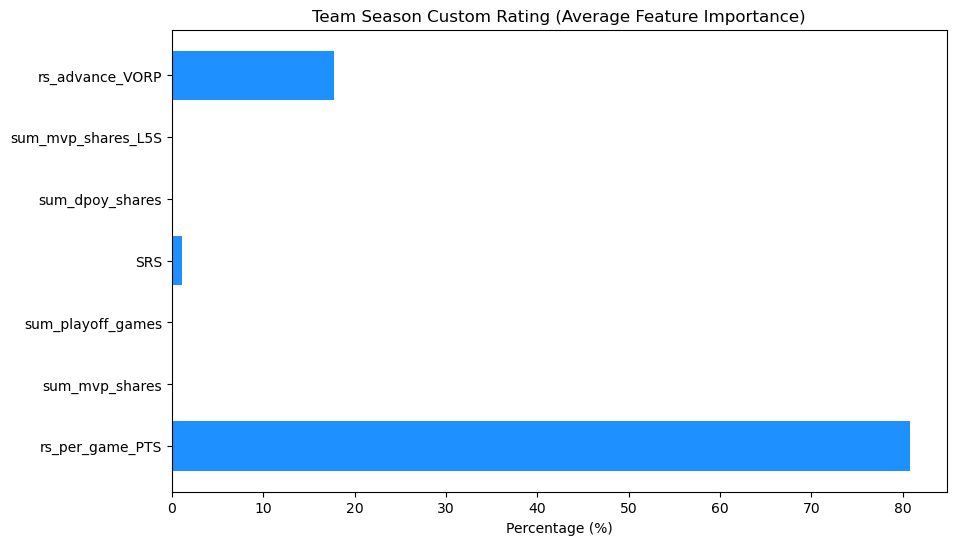

rs_advance_VORP: 17.74%
sum_mvp_shares_L5S: 0.16%
sum_dpoy_shares: 0.11%
SRS: 1.17%
sum_playoff_games: 0.06%
sum_mvp_shares: 0.00%
rs_per_game_PTS: 80.76%


In [23]:
# Defining features and weights -ja
features = ['rs_advance_VORP', 'sum_mvp_shares_L5S', 'sum_dpoy_shares', 'SRS', 'sum_playoff_games', 'sum_mvp_shares', 'rs_per_game_PTS']
weights = [5,1,1,2,.0005,.005,1.5]

# Calculate the average of each feature -ja
averages = player_db[features].mean()

# Apply weights to each average -ja
weighted_values = averages * weights

# Calculate total weighted sum -ja
total_weighted_sum = weighted_values.sum()

# Calculate percentage of each weighted value relative to the total weighted sum -ja
percentages = (weighted_values / total_weighted_sum) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, percentages, color='dodgerblue')
plt.xlabel('Percentage (%)')
plt.title('Team Season Custom Rating (Average Feature Importance)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability -ja
plt.show()

# Display the percentage weights for each feature -ja
for feature, percent in zip(features, percentages):
    print(f'{feature}: {percent:.2f}%')

In [24]:
#sort the DataFrame by 'Player' and 'season' in descending order-ja
player_db = player_db.sort_values(by=['Player', 'season'], ascending=[True, False])

#list of columns to create cumulative sums for-ja
columns_to_cumsum = [
    ('champion_share', 'sum_champion_shares'),
    ('champion', 'sum_champions'),
]

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
player_db = player_db.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position
for col, new_col in columns_to_cumsum:
    player_db[new_col] = player_db.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league
for col, new_col in columns_to_cumsum:
    # Find the first season for each player
    first_season_players = player_db.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season
    player_db.loc[first_season_players.index, new_col] = 0

#sort the DataFrame back by 'season' in descending order-ja
player_db = player_db.sort_values(by='season', ascending=False)

#function to calculate the rolling sum for the last N seasons excluding the current season-ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Player')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
player_db = player_db.sort_values(by=['Player', 'season'])

#calculate the rolling sums-ja
player_db = calculate_rolling_sum(player_db, 'champion_share', 'sum_player_L1S_cs', 1)
player_db = calculate_rolling_sum(player_db, 'champion_share', 'sum_player_L3S_cs', 3)
player_db = calculate_rolling_sum(player_db, 'champion_share', 'sum_player_L5S_cs', 5)
player_db = calculate_rolling_sum(player_db, 'champion_share', 'sum_player_L8S_cs', 8)

#sort the DataFrame back by 'season' in descending order-ja
player_db = player_db.sort_values(by='season', ascending=False)

#save it -ja
player_db.to_csv('player_db.csv', index=False, encoding="utf-8-sig")

### Coach Database

In [25]:
#merge the 'team_id' column from 'custom_team_franchise_index' into 'player_db' using 'Team' as the criteria-ja
coaches_season = pd.merge(coaches_season, all_award_coach_voting[['Coach', 'season', 'coy_share', 'won_coy']], on=['Coach','season'], how='left')
coaches_season = coaches_season.fillna(0)

#sort the DataFrame by 'Player' and 'season' in descending order-ja
coaches_season = coaches_season.sort_values(by=['Coach', 'season'], ascending=[True, False])

#list of columns to create cumulative sums for-ja
columns_to_cumsum = [
    ('po_curr_sea_G', 'sum_coach_playoff_games'),
    ('coy_share', 'sum_coy_shares'),
]

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
coaches_season = coaches_season.sort_values(by=['Coach', 'season'])

# Calculate the cumulative sums and shift by one position- ja
for col, new_col in columns_to_cumsum:
    coaches_season[new_col] = coaches_season.groupby('Coach')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league- ja
for col, new_col in columns_to_cumsum:
    # Find the first season for each player
    first_season_players = coaches_season.groupby('Coach').head(1)
    
    # Set the cumulative sum to 0 for the first season
    coaches_season.loc[first_season_players.index, new_col] = 0
    
#sort the DataFrame back by 'season' in descending order-ja
coaches_season = coaches_season.sort_values(by='season', ascending=False)

#save the DataFrame to a CSV file-ja
coaches_season.to_csv('coach_db.csv', index=False, encoding="utf-8-sig")

### Team Database | Raw Champion Data File

In [26]:
#perform the merge-ja
RS_Advanced_Team = RS_Advanced_Team.merge(
    custom_team_season_index[['team_id', 'season', 'conference']],
    on=['team_id', 'season'],
    how='left'
)

#filter out rows where 'conference' is NaN or blank-ja
filtered_df = RS_Advanced_Team.dropna(subset=['conference'])
filtered_df = filtered_df[filtered_df['conference'] != '']

#drop duplicate rows based on 'team_id' and 'season' and make a copy-ja
unique_df = filtered_df.drop_duplicates(subset=['team_id', 'season']).copy()

#create the 'rk_conference' column using .loc-ja
unique_df.loc[:, 'rk_conference'] = unique_df.groupby(['season', 'conference'])['overall_record'].rank(ascending=False, method='min')

#create the 'top_3_conference' column using .loc-ja
unique_df.loc[:, 'top_3_conference'] = (unique_df['rk_conference'] <= 3).astype(int)

unique_df = unique_df.merge(
    RS_Per_Game_Team[['team_id', 'season', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
                      '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']],
    on=['team_id', 'season'],
    how='left'
)

unique_df = unique_df.merge(
    RS_Opp_Per_Game_Team[['team_id', 'season', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%',
                          'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS']],
    on=['team_id', 'season'],
    how='left'
)

unique_df = unique_df.merge(
    PSO_Team[['team_id', 'season', 'Odds']],
    on=['team_id', 'season'],
    how='left'
)

#remove duplicates rows based on 'team_id' and 'season'-ja
unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#sort the DataFrame by 'season' in descending order and 'overall_record' in descending order-ja
unique_df = unique_df.sort_values(by=['season', 'overall_record'], ascending=[False, False])

#### Features: over500_rec, over600_rec, sum_wins_20pts_or_more, rec_5pts_or_less, sum_games_5pts_or_less

In [27]:
#select only the specified columns-ja
selected_columns_df = RS_Schedule_Team[['Season', 'Visitor/Neutral', 'v/n_pts', 'Home/Neutral', 'h/n_pts']]

#rename the 'Season' column to 'season'-ja
selected_columns_df = selected_columns_df.rename(columns={'Season': 'season'})

selected_columns_df = selected_columns_df.sort_values(by=['season'], ascending=[False])

def move_team2_below_team1(selected_columns_df):
    #convert 'v/n_pts' and 'h/n_pts' to numeric values-ja
    selected_columns_df['v/n_pts'] = pd.to_numeric(selected_columns_df['v/n_pts'], errors='coerce')
    selected_columns_df['h/n_pts'] = pd.to_numeric(selected_columns_df['h/n_pts'], errors='coerce')

    #create a list to store the rearranged data-ja
    rearranged_data = []

    for _, row in selected_columns_df.iterrows():
        #calculate point differentials-ja
        point_diff_team_1 = row['v/n_pts'] - row['h/n_pts']
        point_diff_team_2 = row['h/n_pts'] - row['v/n_pts']

        #extract information for team_1-ja
        team_1_data = {
            'season': row['season'],
            'team/season': f"{row['Visitor/Neutral']} {row['season']}",
            'team': row['Visitor/Neutral'],
            'won': int(point_diff_team_1 > 0),
            'points': row['v/n_pts'],
            'PD': point_diff_team_1
        }
        #extract information for team_2-ja
        team_2_data = {
            'season': row['season'],
            'team/season': f"{row['Home/Neutral']} {row['season']}",
            'team': row['Home/Neutral'],
            'won': int(point_diff_team_2 > 0),
            'points': row['h/n_pts'],
            'PD': point_diff_team_2
        }
        
        #append data for team_1 and team_2 to the list-ja
        rearranged_data.append(team_1_data)
        rearranged_data.append(team_2_data)

    #create a new DataFrame from the list-ja
    new_df = pd.DataFrame(rearranged_data)

    return new_df

selected_columns_df = pd.DataFrame(selected_columns_df)

#call the function to move 'team_2' and 'team_2_pts' below 'team_1' and 'team_1_pts'-ja
new_df = move_team2_below_team1(selected_columns_df)

new_df

,season,team/season,team,won,points,PD
0,2024,Detroit Pistons 2024,Detroit Pistons,0,95.0,-28.0
1,2024,San Antonio Spurs 2024,San Antonio Spurs,1,123.0,28.0
2,2024,Toronto Raptors 2024,Toronto Raptors,0,111.0,-10.0
3,2024,Philadelphia 76ers 2024,Philadelphia 76ers,1,121.0,10.0
4,2024,New Orleans Pelicans 2024,New Orleans Pelicans,1,123.0,19.0
...,...,...,...,...,...,...
130583,1950,Minneapolis Lakers 1950,Minneapolis Lakers,1,100.0,33.0
130584,1950,Rochester Royals 1950,Rochester Royals,1,73.0,8.0
130585,1950,New York Knicks 1950,New York Knicks,0,65.0,-8.0
130586,1950,Denver Nuggets 1950,Denver Nuggets,0,85.0,-8.0


In [28]:
#createthestat_calc DataFrame by selecting specific columns-ja
stat_calc = unique_df[['season', 'Team', 'overall_record']].copy()

#renamethe 'Team' column to 'team'-ja
stat_calc = stat_calc.rename(columns={'Team': 'team'})

#create the 'team/season' column by concatenating 'team' and 'season'-ja
stat_calc['team/season'] = stat_calc['team'] + ' ' + stat_calc['season'].astype(str)

#createthe 'over_500' column in stat_calc-ja
stat_calc['over_500'] = (stat_calc['overall_record'] >= 0.5).astype(int)

#createthe 'over_600' column in stat_calc-ja
stat_calc['over_600'] = (stat_calc['overall_record'] >= 0.6).astype(int)

#createthe '20_pts_or_more' column in new_df-ja
new_df['20_pts_or_more'] = (new_df['PD'].abs() >= 20).astype(int)

#createthe '5_pts_or_less' column in new_df-ja
new_df['5_pts_or_less'] = (new_df['PD'].abs() <= 5).astype(int)

new_df = new_df.merge(
    stat_calc[['team/season', 'over_500', 'over_600']],
    on='team/season',
    how='left'
)

#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_500'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_500'] = new_df.at[idx2, 'over_500']
    new_df.at[idx2, 'opp_over_500'] = new_df.at[idx1, 'over_500']
    
#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_600'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_600'] = new_df.at[idx2, 'over_600']
    new_df.at[idx2, 'opp_over_600'] = new_df.at[idx1, 'over_600']


In [29]:
new_df['over500_win'] = ((new_df['won'] == 1) & (new_df['opp_over_500'] == 1)).astype(int)
new_df['over600_win'] = ((new_df['won'] == 1) & (new_df['opp_over_600'] == 1)).astype(int)
new_df['20_pts_or_more_win'] = ((new_df['won'] == 1) & (new_df['20_pts_or_more'] == 1)).astype(int)
new_df['5_pts_or_less_win'] = ((new_df['won'] == 1) & (new_df['5_pts_or_less'] == 1)).astype(int)

#500

#calculate the sum of 'over500_win' for each 'team/season' in new_df-ja
over500_win_sum = new_df.groupby('team/season')['over500_win'].sum().reset_index()
over500_win_sum = over500_win_sum.rename(columns={'over500_win': 'over500_win_sum'})

#calculate the sum of 'opp_over_500' for each 'team/season' in new_df-ja
opp_over_500_sum = new_df.groupby('team/season')['opp_over_500'].sum().reset_index()
opp_over_500_sum = opp_over_500_sum.rename(columns={'opp_over_500': 'opp_over_500_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over500_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_500_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over500_win_sum'] = stat_calc['over500_win_sum'].fillna(0)
stat_calc['opp_over_500_sum'] = stat_calc['opp_over_500_sum'].fillna(0)

#calculate the 'over500_rec' column-ja
stat_calc['over500_rec'] = stat_calc['over500_win_sum'] / stat_calc['opp_over_500_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over500_rec'] = stat_calc['over500_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over500_win_sum', 'opp_over_500_sum'])


C:\Users\allen\AppData\Local\Temp\ipykernel_30956\1347362995.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stat_calc['over500_rec'] = stat_calc['over500_rec'].fillna(0).replace([pd.NA, float('inf')], 0)


In [30]:
#600

#calculate the sum of 'over600_win' for each 'team/season' in new_df-ja
over600_win_sum = new_df.groupby('team/season')['over600_win'].sum().reset_index()
over600_win_sum = over600_win_sum.rename(columns={'over600_win': 'over600_win_sum'})

#calculate the sum of 'opp_over_600' for each 'team/season' in new_df-ja
opp_over_600_sum = new_df.groupby('team/season')['opp_over_600'].sum().reset_index()
opp_over_600_sum = opp_over_600_sum.rename(columns={'opp_over_600': 'opp_over_600_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over600_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_600_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over600_win_sum'] = stat_calc['over600_win_sum'].fillna(0)
stat_calc['opp_over_600_sum'] = stat_calc['opp_over_600_sum'].fillna(0)

#calculate the 'over600_rec' column-ja
stat_calc['over600_rec'] = stat_calc['over600_win_sum'] / stat_calc['opp_over_600_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over600_rec'] = stat_calc['over600_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over600_win_sum', 'opp_over_600_sum'])


C:\Users\allen\AppData\Local\Temp\ipykernel_30956\189091461.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stat_calc['over600_rec'] = stat_calc['over600_rec'].fillna(0).replace([pd.NA, float('inf')], 0)


In [31]:
#calculate the sum of '20_pts_or_more_win' for each 'team/season' in new_df-ja
wins_20pts_or_more_sum = new_df.groupby('team/season')['20_pts_or_more_win'].sum().reset_index()
wins_20pts_or_more_sum = wins_20pts_or_more_sum.rename(columns={'20_pts_or_more_win': 'sum_wins_20pts_or_more'})

#calculate the sum of '5_pts_or_less_win' for each 'team/season' in new_df-ja
wins_5pts_or_less_sum = new_df.groupby('team/season')['5_pts_or_less_win'].sum().reset_index()
wins_5pts_or_less_sum = wins_5pts_or_less_sum.rename(columns={'5_pts_or_less_win': 'wins_5pts_or_less_sum'})

#calculate the sum of '5_pts_or_less' for each 'team/season' in new_df-ja
games_5pts_or_less_sum = new_df.groupby('team/season')['5_pts_or_less'].sum().reset_index()
games_5pts_or_less_sum = games_5pts_or_less_sum.rename(columns={'5_pts_or_less': 'games_5pts_or_less_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(wins_20pts_or_more_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(wins_5pts_or_less_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(games_5pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['sum_wins_20pts_or_more'] = stat_calc['sum_wins_20pts_or_more'].fillna(0)
stat_calc['wins_5pts_or_less_sum'] = stat_calc['wins_5pts_or_less_sum'].fillna(0)
stat_calc['games_5pts_or_less_sum'] = stat_calc['games_5pts_or_less_sum'].fillna(0)

#calculate the 'rec_5pt_or_less' column-ja
stat_calc['rec_5pt_or_less'] = stat_calc['wins_5pts_or_less_sum'] / stat_calc['games_5pts_or_less_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['rec_5pt_or_less'] = stat_calc['rec_5pt_or_less'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['wins_5pts_or_less_sum', 'games_5pts_or_less_sum'])

#calculate the sum of '5_pts_or_less' for each 'team/season' in new_df-ja
games_5pts_or_less_sum = new_df.groupby('team/season')['5_pts_or_less'].sum().reset_index()
games_5pts_or_less_sum = games_5pts_or_less_sum.rename(columns={'5_pts_or_less': 'sum_games_5pts_or_less'})

#merge the sum into stat_calc-ja
stat_calc = stat_calc.merge(games_5pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['sum_games_5pts_or_less'] = stat_calc['sum_games_5pts_or_less'].fillna(0)

stat_calc = stat_calc.rename(columns={'team': 'Team'})

#merge the specified columns from stat_calc into unique_df-ja
columns_to_merge = ['season', 'Team', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less']

unique_df = unique_df.merge(
    stat_calc[columns_to_merge],
    on=['season', 'Team'],
    how='left'
)

#display the updated unique_df DataFrame-ja
unique_df

C:\Users\allen\AppData\Local\Temp\ipykernel_30956\2313547888.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stat_calc['rec_5pt_or_less'] = stat_calc['rec_5pt_or_less'].fillna(0).replace([pd.NA, float('inf')], 0)


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,opp_BLK,opp_TOV,opp_PF,opp_PTS,Odds,over500_rec,over600_rec,sum_wins_20pts_or_more,rec_5pt_or_less,sum_games_5pts_or_less
0,1,Boston Celtics,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,10.75,...,3.7,12.0,17.3,109.2,450.0,0.693878,0.600000,19.0,0.526316,19.0
1,2,Oklahoma City Thunder,23.4,57.0,25.0,58.0,24.0,7.41,-0.05,7.36,...,5.1,15.7,18.9,112.7,10000.0,0.622642,0.684211,17.0,0.588235,17.0
2,4,Denver Nuggets,27.1,57.0,25.0,54.0,28.0,5.26,-0.03,5.23,...,4.8,12.4,17.9,109.6,450.0,0.557692,0.526316,11.0,0.500000,22.0
3,3,Minnesota Timberwolves,27.2,56.0,26.0,57.0,25.0,6.45,-0.07,6.39,...,4.5,14.2,19.9,106.5,6600.0,0.615385,0.600000,14.0,0.571429,21.0
4,7,Los Angeles Clippers,30.4,51.0,31.0,49.0,33.0,3.28,0.13,3.41,...,4.7,13.0,18.7,112.3,2200.0,0.509434,0.444444,9.0,0.529412,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,17,Baltimore Bullets,NaN,25.0,43.0,18.0,50.0,-5.59,1.04,-4.55,...,NaN,NaN,NaN,78.7,NaN,0.305556,0.312500,1.0,0.600000,15.0
1629,7,Sheboygan Red Skins,NaN,22.0,40.0,18.0,44.0,-5.40,-0.44,-5.85,...,NaN,NaN,NaN,87.8,NaN,0.258065,0.277778,4.0,0.526316,19.0
1630,16,Boston Celtics,NaN,22.0,46.0,27.0,41.0,-2.50,0.79,-1.73,...,NaN,NaN,NaN,82.2,NaN,0.194444,0.125000,5.0,0.235294,17.0
1631,3,Waterloo Hawks,NaN,19.0,43.0,17.0,45.0,-5.53,-0.43,-5.96,...,NaN,NaN,NaN,84.9,NaN,0.129032,0.166667,5.0,0.437500,16.0


##### Pulling data from first player_db and coach_db

In [32]:


#specify the columns to merge from RS_exp_stand_Team-ja
columns_to_merge = [
    'season', 'Team', 'home_rec', 'road_rec',
    '3pt_or_less_rec', '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec'
]

#merge the specified columns from RS_exp_stand_Team into unique_df-ja
unique_df = unique_df.merge(
    RS_exp_stand_Team[columns_to_merge],
    on=['season', 'Team'],
    how='left'
)

#drop duplicate rows based on 'Team' and 'season'-ja
unique_df = unique_df.drop_duplicates(subset=['Team', 'season'])

#remove duplicate rows based on 'team_id' and 'season' in player_db-ja
unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#list of columns to sum in player_db-ja
columns_to_sum = [
    'sum_mvp_shares', 'sum_dpoy_shares', 'sum_roy_shares', 'sum_smoy_shares', 
    'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 
    'sum_all_rookie', 'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 
    'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 
    'sum_playoff_games', 'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S',
    'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 
    'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'sum_all_nba_1st_L5S'
]

#group by 'team_id' and 'season' and sum the specified columns-ja
player_db_summed = player_db.groupby(['team_id', 'season'])[columns_to_sum].sum().reset_index()

#merge the summed columns into unique_df-ja
unique_df = unique_df.merge(
    player_db_summed,
    on=['team_id', 'season'],
    how='left'
)

#remove duplicate rows based on 'team_id' and 'season' in unique_df-ja
unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#group by 'team_id' and 'season' and calculate the average of 'player_rating_custom'-ja
player_rating_avg = player_db.groupby(['team_id', 'season'])['player_rating_custom'].mean().reset_index()
player_rating_avg = player_rating_avg.rename(columns={'player_rating_custom': 'team_rating_custom'})

#merge the averaged column into unique_df-ja
unique_df = unique_df.merge(
    player_rating_avg,
    on=['team_id', 'season'],
    how='left'
)

#remove duplicate rows based on 'team_id' and 'season' in unique_df-ja
unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#group by 'team_id' and 'season' and calculate the max of 'player_rating_custom'-ja
player_rating_max = player_db.groupby(['team_id', 'season'])['player_rating_custom'].max().reset_index()
player_rating_max = player_rating_max.rename(columns={'player_rating_custom': 'max_player_rating_custom'})

#merge the max column into unique_df-ja
unique_df = unique_df.merge(
    player_rating_max,
    on=['team_id', 'season'],
    how='left'
)

#remove duplicate rows based on 'team_id' and 'season' in unique_df-ja
unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#find the player with the max_player_rating_custom for each team_id and season-ja
player_max_rating = player_db.loc[player_db.groupby(['team_id', 'season'])['player_rating_custom'].idxmax()]
player_max_rating = player_max_rating[['team_id', 'season', 'Player']]
player_max_rating = player_max_rating.rename(columns={'Player': 'max_player'})

#merge the max_player information into unique_df-ja
unique_df = unique_df.merge(
    player_max_rating[['team_id', 'season', 'max_player']],
    on=['team_id', 'season'],
    how='left'
)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#merge the specified columns from coaches_season into unique_df-ja
unique_df = unique_df.merge(
    coaches_season[['team_id', 'season', 'sum_coach_playoff_games', 'sum_coy_shares']],
    on=['team_id', 'season'],
    how='left'
)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#calculate the average of 'rec_5pt_or_less' grouped by 'conference' and 'season'-ja
unique_df['conference_5pt_or_less_rec'] = unique_df.groupby(['conference', 'season'])['rec_5pt_or_less'].transform('mean')
unique_df['conference_OR'] = unique_df.groupby(['conference', 'season'])['overall_record'].transform('mean')
unique_df['conference_SRS'] = unique_df.groupby(['conference', 'season'])['SRS'].transform('mean')
unique_df['conference_age'] = unique_df.groupby(['conference', 'season'])['Age'].transform('mean')

unique_df = unique_df.rename(columns={'Odds': 'pso'})

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

unique_df = pd.merge(
    unique_df,
    PO_Advanced_Team[['season', 'team_id', 'champion', 'champion_share']],
    on=['season', 'team_id'],
    how='left'
)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

#creating franchise stats-ja
unique_df = unique_df.sort_values(by='season', ascending=False)

#function to calculate the rolling sum for the last N seasons excluding the current season-ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Team')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
unique_df = unique_df.sort_values(by=['Team', 'season'])

#calculate the rolling sums-ja
unique_df = calculate_rolling_sum(unique_df, 'champion_share', 'sum_franchise_L1S_cs', 1)
unique_df = calculate_rolling_sum(unique_df, 'champion_share', 'sum_franchise_L3S_cs', 3)
unique_df = calculate_rolling_sum(unique_df, 'champion_share', 'sum_franchise_L5S_cs', 5)
unique_df = calculate_rolling_sum(unique_df, 'champion_share', 'sum_franchise_L8S_cs', 8)

#sort the DataFrame back by 'season' in descending order-ja
unique_df = unique_df.sort_values(by='season', ascending=False)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

unique_df = unique_df.sort_values(by=['overall_record', 'season'], ascending=[False, False])

unique_df['champion_share'] = unique_df['champion_share'].fillna(0)
unique_df['champion'] = unique_df['champion'].fillna(0)

#list of columns in the desired order-ja
desired_order = [
    'season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share',
    'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference'
]

#append the remaining columns to the desired order-ja
remaining_columns = [col for col in unique_df.columns if col not in desired_order]
final_order = desired_order + remaining_columns

#reorder the DataFrame-ja
unique_df = unique_df[final_order]

unique_df = unique_df.sort_values(by=['season', 'overall_record'], ascending=[False, False])

unique_df.to_csv('NBA Champion RawData.csv', index=False, encoding="utf-8-sig")
print(list(unique_df))


['season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [33]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)

exclude_columns = ['Arena', 'make_playoffs', 'season','Rk', 'Team', 'rk_season', 'team_id', 'conference', 'rk_conference', 'top_3_conference', 'max_player', 'champion', 'champion_share']

reverse_rank_columns = ['pso', 'DRtg']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=False)
            
df = df.sort_values(by=['season', 'overall_record'], ascending=[False, True])

df.to_csv("NBA Champion LR Data.csv",index=False, encoding="utf-8-sig")
print(list(df))

['season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

##### Adding Rank Features based on personal Champion Analysis

In [34]:

columns_to_merge = {
    'offensive_eFG%': 'rank_offensive_eFG%',
    '2P%': 'rank_2P%',
    'sum_all_nba_1st_L5S': 'rank_sum_all_nba_1st_L5S',
    'SRS': 'rank_SRS'
}
df_to_merge = df[['season', 'team_id'] + list(columns_to_merge.keys())].rename(columns=columns_to_merge)


unique_df = pd.merge(
    unique_df,
    df_to_merge,
    on=['team_id', 'season'],
    how='left'
)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

unique_df['top_5_offensive_eFG%'] = unique_df['rank_offensive_eFG%'].apply(lambda x: 1 if x <= 5 else 0)
unique_df['top_3_2P%'] = unique_df['2P%'].apply(lambda x: 1 if x <= 3 else 0)
unique_df['top_5_sum_all_nba_1st_L5S'] = unique_df['sum_all_nba_1st_L5S'].apply(lambda x: 1 if x <= 5 else 0)
unique_df['top_6_SRS'] = unique_df['rank_SRS'].apply(lambda x: 1 if x <= 6 else 0)

unique_df = unique_df.drop_duplicates(subset=['team_id', 'season'])

unique_df = unique_df.sort_values(by=['season', 'overall_record'], ascending=[False, False])

unique_df.to_csv('NBA Champion RawData.csv', index=False, encoding="utf-8-sig")

### Total Project Files:
- 18 scrape data files
- 3 index files
- 2 db files (player/coach)
- 2 champion files (raw/LR)